In [1]:
!pip install transformers torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [2]:
import getpass
import os
os.environ["HUGGINGFACE_API_KEY"] = getpass.getpass()

··········


In [3]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

import pandas as pd
gsheets = gc.open_by_url('https://docs.google.com/spreadsheets/d/1pe5RMEWSZ3TU28db6WyWHYaH3g3lZ28LlvvLuZ58c28/edit#gid=0')
sheets1 = gsheets.worksheet('10news').get_all_values()

df = pd.DataFrame(sheets1[1:], columns=sheets1[0])

因為原先數據太多，電腦跑不動，因此只取前十項新聞內容存入新的工作表" 10news "中，作為這次的特徵提取資料，內容如下

In [4]:
df.head()

,title,link,content
0,社會前酒店少爺2度闖東家偷2.5萬小費 3男當街對他上銬也有事,https://www.ettoday.net/news/20240417/2721593.htm,北市中山區1家酒店日前發生離職員工2度趁店家休息之際，拿鑰匙潛入櫃台偷拿小費箱的錢，共計2次...
1,影劇被問是什麼星座？嚴立婷狂回「雞」 對話曝光笑翻網友,https://star.ettoday.net/news/2721512,女星嚴立婷個性直率，因作風海派而被粉絲稱為「嚴哥」，不時透過社群平台分享生活日常的她，昨（1...
2,影劇歐漢聲虧前妻「桃花旺」感情近況曝！ 被問黃子佼嘆氣：沒有私交,https://star.ettoday.net/news/2721594,《原子少年》將於今夏推出第二季，導師歐漢聲（歐弟）今（17日）現身節目特別企劃，其中iKON...
3,社會中山高264K「司機恍神」小貨車撞工程緩衝車 90度側翻外車道,https://www.ettoday.net/news/20240417/2721592.htm,國道1號北向264.7公里嘉義路段，4月17日14時50分在發生交通事故，嘉義市消防局接獲民...
4,生活涵碧樓才洗得到！香氛品牌聯名咖啡店 推母親節限定禮盒做公益,https://www.ettoday.net/news/20240417/2721579.htm,母親節即將到來，南投高檔飯店涵碧樓所使用的台灣在地香氛品牌「Hsuan Ri Fen炫日芬」...


In [5]:
import re
def keep_chinese_chars(text):
    pattern = re.compile(r'[^\u4e00-\u9fff]')
    chinese_text = re.sub(pattern, '', text)
    return chinese_text

In [6]:
text = df['content'][0]
text = keep_chinese_chars(text)
text

'北市中山區家酒店日前發生離職員工度趁店家休息之際拿鑰匙潛入櫃台偷拿小費箱的錢共計次約損失萬日下午時許與酒店員工相識的名男子在路邊看到陳男立刻上前將他攔下並通知酒店員工為了防止其逃脫還用手銬將控制其行動並通知警方殊不知因上手銬的舉動連帶人也一併被帶回派出所警方調查北市中山區名歲陳姓男子原本在酒店擔任前員工離職後趁酒店人員下班之際度闖入趁隙偷走萬元日下午時許在中山北路段巷內被酒店的友人發現行蹤並通知賴姓酒店員工前來確認確認後立刻通知警方到場為了防止陳逃跑還拿出手銬將陳男上銬原文網址前酒店少爺度闖東家偷萬小費男當街對他上銬也有事社會新聞新聞雲'

In [8]:
import jieba
import jieba.analyse

jieba.analyse.extract_tags(text, topK=10)

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.352 seconds.
DEBUG:jieba:Loading model cost 1.352 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


['酒店', '通知', '時許', '手銬', '確認', '新聞', '警方', '中山', '男子', '中山北路']

a. 一般 jieba 斷詞後取詞頻關鍵字

In [9]:
def extract_keywords1(text):
    text = keep_chinese_chars(text)
    return jieba.analyse.extract_tags(text, topK=10)

df['keywords1'] = df['content'].apply(extract_keywords1)

In [10]:
df.head()

,title,link,content,keywords1
0,社會前酒店少爺2度闖東家偷2.5萬小費 3男當街對他上銬也有事,https://www.ettoday.net/news/20240417/2721593.htm,北市中山區1家酒店日前發生離職員工2度趁店家休息之際，拿鑰匙潛入櫃台偷拿小費箱的錢，共計2次...,"[酒店, 通知, 時許, 手銬, 確認, 新聞, 警方, 中山, 男子, 中山北路]"
1,影劇被問是什麼星座？嚴立婷狂回「雞」 對話曝光笑翻網友,https://star.ettoday.net/news/2721512,女星嚴立婷個性直率，因作風海派而被粉絲稱為「嚴哥」，不時透過社群平台分享生活日常的她，昨（1...,"[嚴立婷, 星座, 對方, 問題, 什麼, 一心二用, 客服, 因為, 網址, 問是]"
2,影劇歐漢聲虧前妻「桃花旺」感情近況曝！ 被問黃子佼嘆氣：沒有私交,https://star.ettoday.net/news/2721594,《原子少年》將於今夏推出第二季，導師歐漢聲（歐弟）今（17日）現身節目特別企劃，其中iKON...,"[前妻, 歐漢聲, 歐弟, 沒有, 桃花, 導師, 特別, 身邊, 網址, 近況]"
3,社會中山高264K「司機恍神」小貨車撞工程緩衝車 90度側翻外車道,https://www.ettoday.net/news/20240417/2721592.htm,國道1號北向264.7公里嘉義路段，4月17日14時50分在發生交通事故，嘉義市消防局接獲民...,"[小貨車, 新聞, 現場, 翻覆, 救護, 發生, 發現, 緩衝車, 駕駛, 網址]"
4,生活涵碧樓才洗得到！香氛品牌聯名咖啡店 推母親節限定禮盒做公益,https://www.ettoday.net/news/20240417/2721579.htm,母親節即將到來，南投高檔飯店涵碧樓所使用的台灣在地香氛品牌「Hsuan Ri Fen炫日芬」...,"[蛋糕, 涵碧樓, 親節, 新聞, 公益, 香氛, 禮盒, 還有, 預購, 咖啡]"


In [11]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from community import community_louvain

In [12]:
G = nx.Graph()

for index, row in df.iterrows():
    title = row['title']
    keywords = row['keywords1']

    G.add_node(title, type='title')

    for keyword in keywords:
        G.add_node(keyword, type='keyword')
        G.add_edge(title, keyword)

In [13]:
keywords

['現場', '急救', '倒地不起', '患者', '有民眾', '救護', '發現', '進行', '電擊次', '新聞']

In [35]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
import matplotlib as mpl
from matplotlib.font_manager import fontManager
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2024-05-01 13:45:26--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.132.138, 74.125.132.101, 74.125.132.139, ...
Connecting to drive.google.com (drive.google.com)|74.125.132.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-05-01 13:45:26--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 209.85.145.132, 2607:f8b0:4001:c1e::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|209.85.145.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  --.-KB/s    in 0.1s    

2024-05-01 13:45:

a. 特徵關聯圖

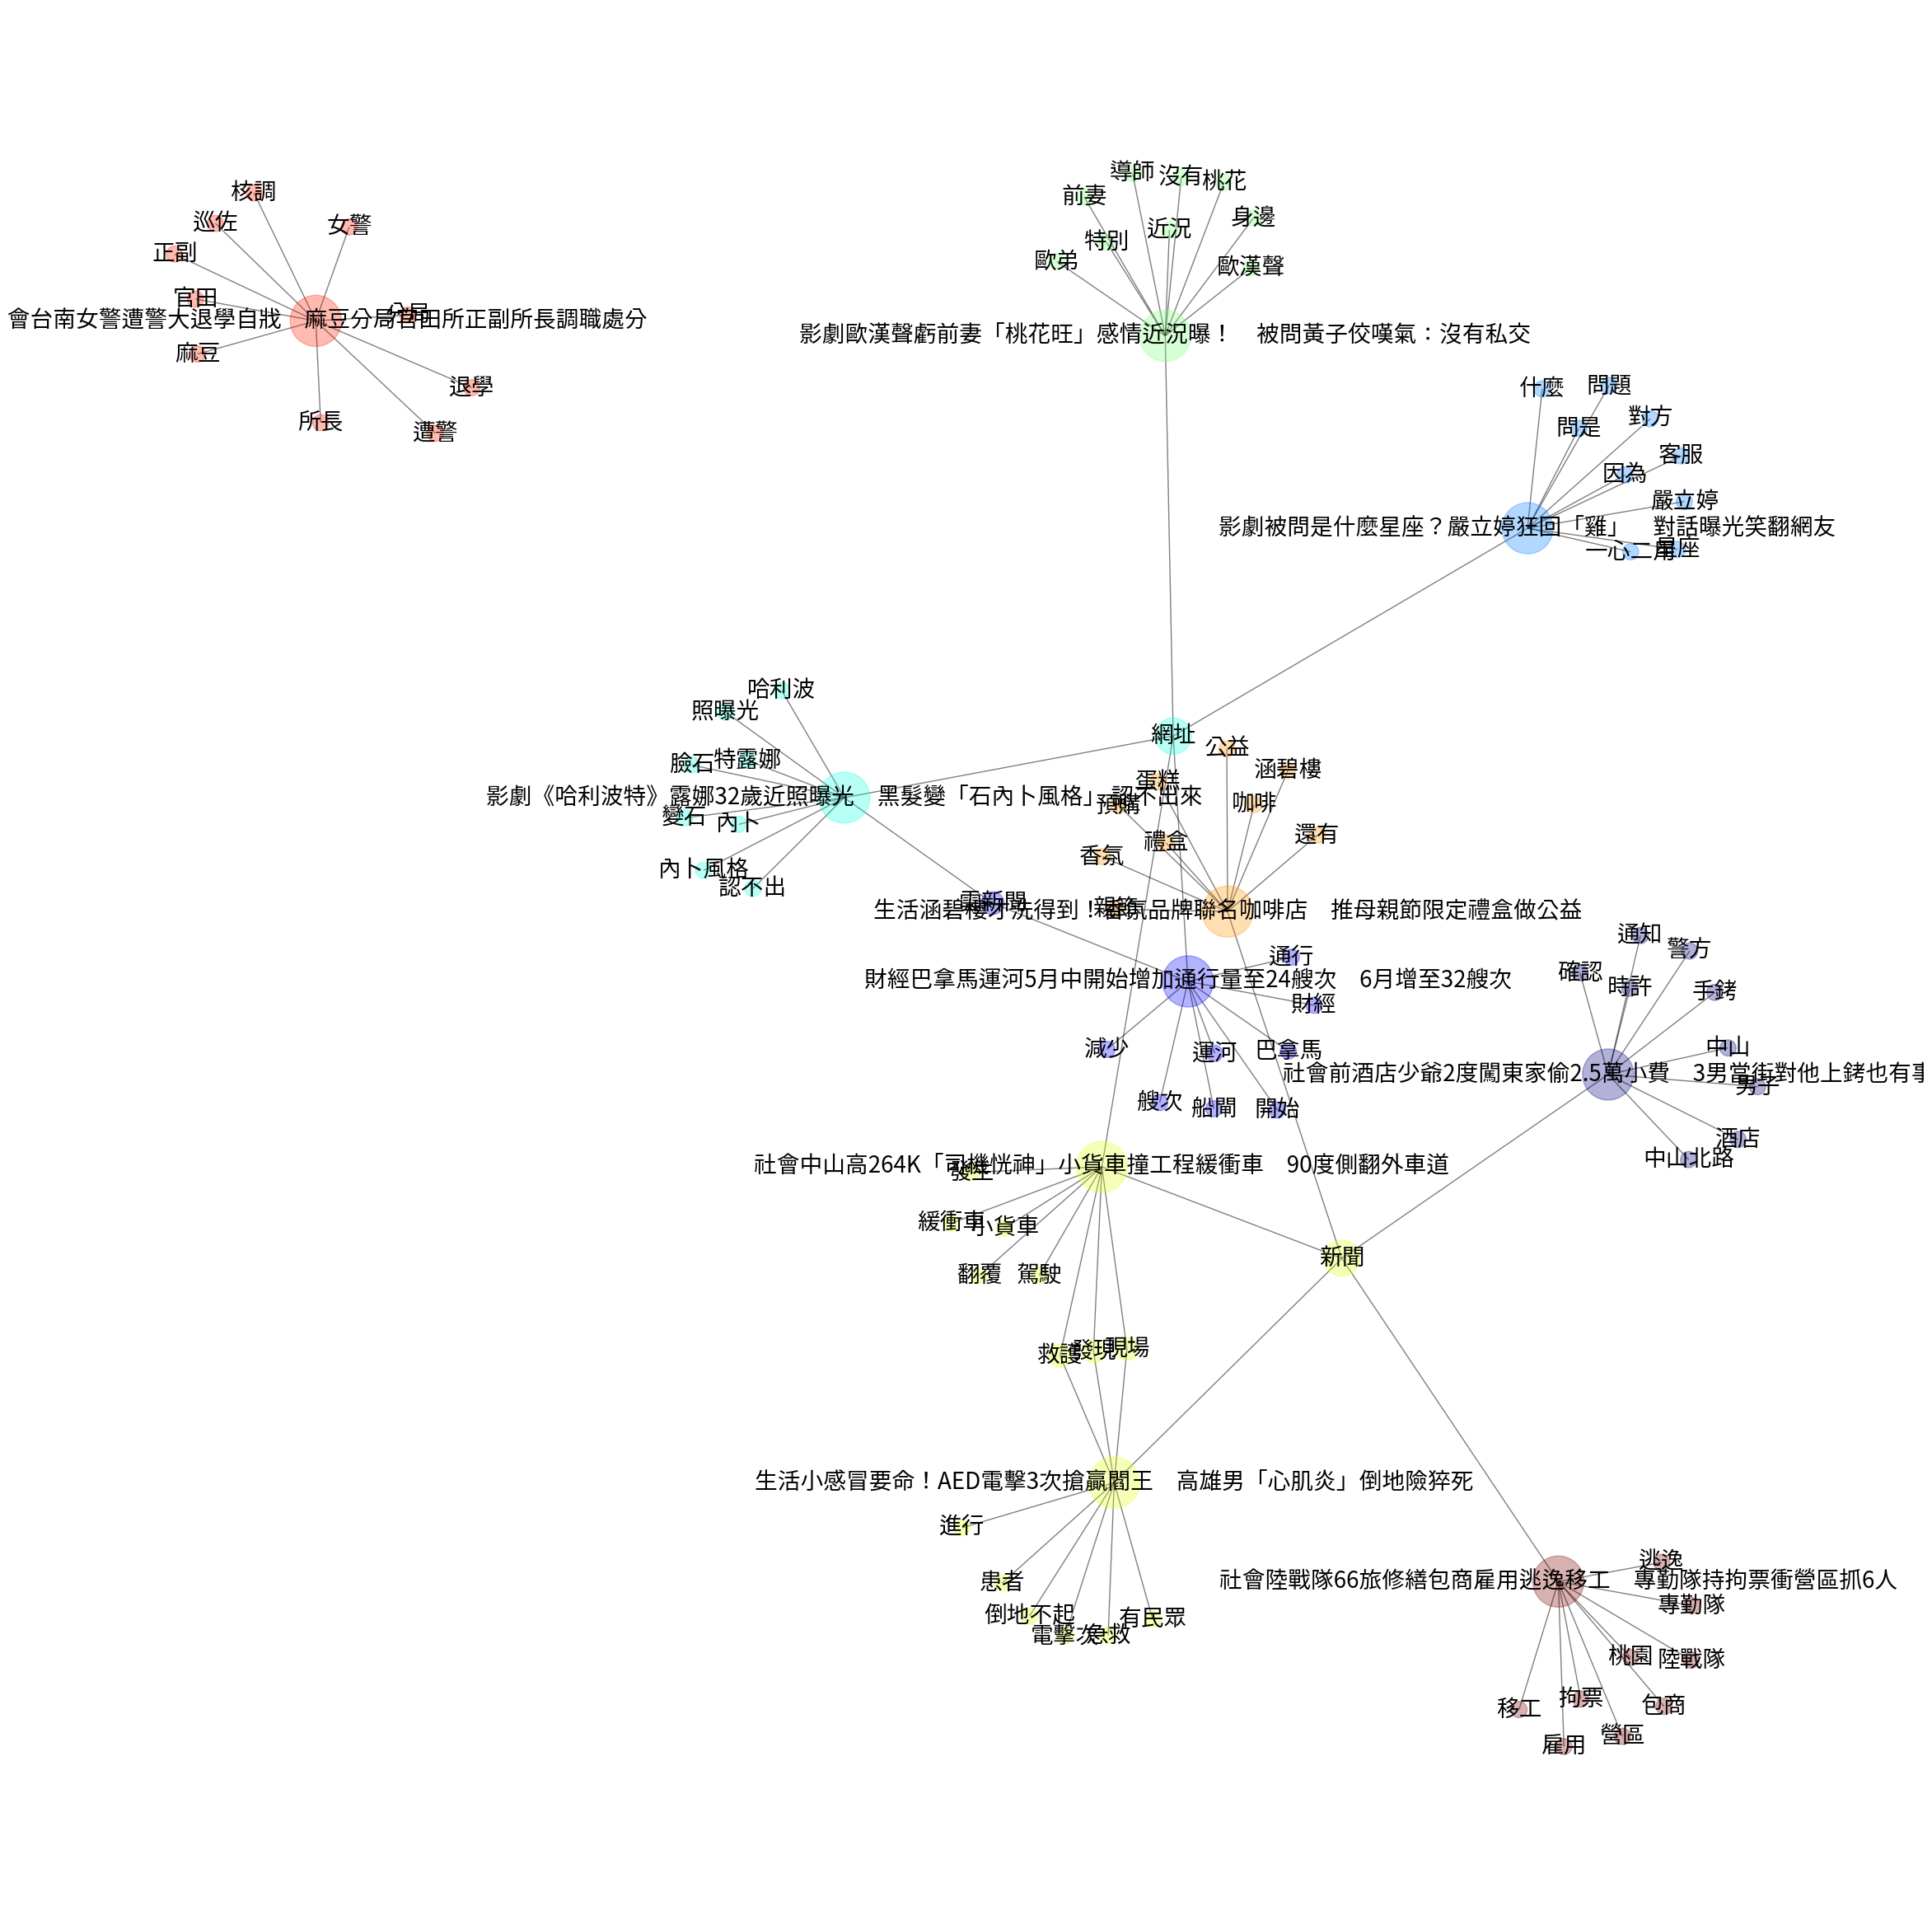

In [37]:
partition = community_louvain.best_partition(G)

community_colors = [partition[node] for node in G.nodes()]

cmap = plt.cm.jet
colors_with_alpha = [cmap(community_color / max(community_colors)) for community_color in community_colors]

colors_with_alpha = [(r, g, b, 0.3) for r, g, b, _ in colors_with_alpha]

node_sizes = [200 * G.degree(node) for node in G.nodes()]

pos = nx.spring_layout(G, k=0.2, iterations=80)

plt.figure(figsize=(30, 30))
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_nodes(G, pos, node_color=colors_with_alpha, node_size=node_sizes, cmap=plt.cm.jet)
nx.draw_networkx_labels(G, pos, font_size=20, font_family='Taipei Sans TC Beta')

plt.axis('off')
plt.show()

b. 透過 LLM 取得摘要後再取關鍵

In [16]:
from transformers import BertTokenizer, BertModel, BertForMaskedLM
import torch

def bart_summarize(text):

    keep_chinese_chars(text)

    tokenizer = BertTokenizer.from_pretrained('hfl/chinese-bert-wwm')
    model = BertForMaskedLM.from_pretrained('hfl/chinese-bert-wwm')

    inputs = tokenizer(text, return_tensors="pt", max_length=100, truncation=True)
    summary_ids = model.generate(inputs['input_ids'], max_length=128)

    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

In [17]:
summary = bart_summarize(text)
print(summary)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/19.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/110k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/269k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/647 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/412M [00:00<?, ?B/s]

Some weights of the model checkpoint at hfl/chinese-bert-wwm were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


北 市 中 山 區 家 酒 店 日 前 發 生 離 職 員 工 度 趁 店 家 休 息 之 際 拿 鑰 匙 潛 入 櫃 台 偷 拿 小 費 箱 的 錢 共 計 次 約 損 失 萬 日 下 午 時 許 與 酒 店 員 工 相 識 的 名 男 子 在 路 邊 看 到 陳 男 立 刻 上 前 將 他 攔 下 並 通 知 酒 店 員 工 為 了 防 止 其 逃 脫 還 用 手 銬 將 控 制 其 。 事 發 後 ， 陳 男 以 手 銬 將 其 控 制 住 ， 並 將 其 交 給 其 父 親 ， 後 因 其


In [19]:
def remove_spaces(text):
    return text.replace(" ", "")

output_text = remove_spaces(summary)
output_text

'北市中山區家酒店日前發生離職員工度趁店家休息之際拿鑰匙潛入櫃台偷拿小費箱的錢共計次約損失萬日下午時許與酒店員工相識的名男子在路邊看到陳男立刻上前將他攔下並通知酒店員工為了防止其逃脫還用手銬將控制其。事發後，陳男以手銬將其控制住，並將其交給其父親，後因其'

In [27]:
def extract_keywords2(text):
    text = keep_chinese_chars(text)
    summary = bart_summarize(text)
    output_text = remove_spaces(summary)

    return jieba.analyse.extract_tags(output_text, topK=10)

df['keywords2'] = df['content'].apply(extract_keywords2)

Some weights of the model checkpoint at hfl/chinese-bert-wwm were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at hfl/chinese-bert-wwm were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a m

In [28]:
df.head()

,title,link,content,keywords1,keywords2
0,社會前酒店少爺2度闖東家偷2.5萬小費 3男當街對他上銬也有事,https://www.ettoday.net/news/20240417/2721593.htm,北市中山區1家酒店日前發生離職員工2度趁店家休息之際，拿鑰匙潛入櫃台偷拿小費箱的錢，共計2次...,"[酒店, 通知, 時許, 手銬, 確認, 新聞, 警方, 中山, 男子, 中山北路]","[手銬, 酒店, 偷拿, 區家, 發生, 職員, 工度, 之際, 鑰匙, 潛入]"
1,影劇被問是什麼星座？嚴立婷狂回「雞」 對話曝光笑翻網友,https://star.ettoday.net/news/2721512,女星嚴立婷個性直率，因作風海派而被粉絲稱為「嚴哥」，不時透過社群平台分享生活日常的她，昨（1...,"[嚴立婷, 星座, 對方, 問題, 什麼, 一心二用, 客服, 因為, 網址, 問是]","[嚴立婷, 一心二用, 個性, 因作風, 粉絲稱, 嚴哥, 不時, 透過, 臉書, 因為]"
2,影劇歐漢聲虧前妻「桃花旺」感情近況曝！ 被問黃子佼嘆氣：沒有私交,https://star.ettoday.net/news/2721594,《原子少年》將於今夏推出第二季，導師歐漢聲（歐弟）今（17日）現身節目特別企劃，其中iKON...,"[前妻, 歐漢聲, 歐弟, 沒有, 桃花, 導師, 特別, 身邊, 網址, 近況]","[導師, 歐弟, 特別, 將於, 歐漢聲, 現身, 節目, 企劃, 成員, 簽售會]"
3,社會中山高264K「司機恍神」小貨車撞工程緩衝車 90度側翻外車道,https://www.ettoday.net/news/20240417/2721592.htm,國道1號北向264.7公里嘉義路段，4月17日14時50分在發生交通事故，嘉義市消防局接獲民...,"[小貨車, 新聞, 現場, 翻覆, 救護, 發生, 發現, 緩衝車, 駕駛, 網址]","[疑似, 救護, 小貨車, 翻覆, 國道號, 嘉義, 時分, 發生, 嘉義市, 消防局]"
4,生活涵碧樓才洗得到！香氛品牌聯名咖啡店 推母親節限定禮盒做公益,https://www.ettoday.net/news/20240417/2721579.htm,母親節即將到來，南投高檔飯店涵碧樓所使用的台灣在地香氛品牌「Hsuan Ri Fen炫日芬」...,"[蛋糕, 涵碧樓, 親節, 新聞, 公益, 香氛, 禮盒, 還有, 預購, 咖啡]","[設立, 咖啡, 南投, 瓦卡, 品牌, 母親, 節即, 將到, 高檔, 飯店]"


In [29]:
G2 = nx.Graph()

for index, row in df.iterrows():
    title = row['title']
    keywords = row['keywords2']

    G2.add_node(title, type='title')

    for keyword in keywords:
        G2.add_node(keyword, type='keyword')
        G2.add_edge(title, keyword)

In [30]:
keywords

['患者', '案件', '倒地不起', '差點', '岡山', '公園', '有民眾', '兩位', '救護員', '現場']

In [33]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
import matplotlib as mpl
from matplotlib.font_manager import fontManager

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2024-05-01 13:43:58--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 173.194.193.113, 173.194.193.139, 173.194.193.138, ...
Connecting to drive.google.com (drive.google.com)|173.194.193.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-05-01 13:43:58--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 209.85.145.132, 2607:f8b0:4001:c1e::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|209.85.145.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  --.-KB/s    in 0.1s    

2024-05-01 13

b. 特徵關聯圖

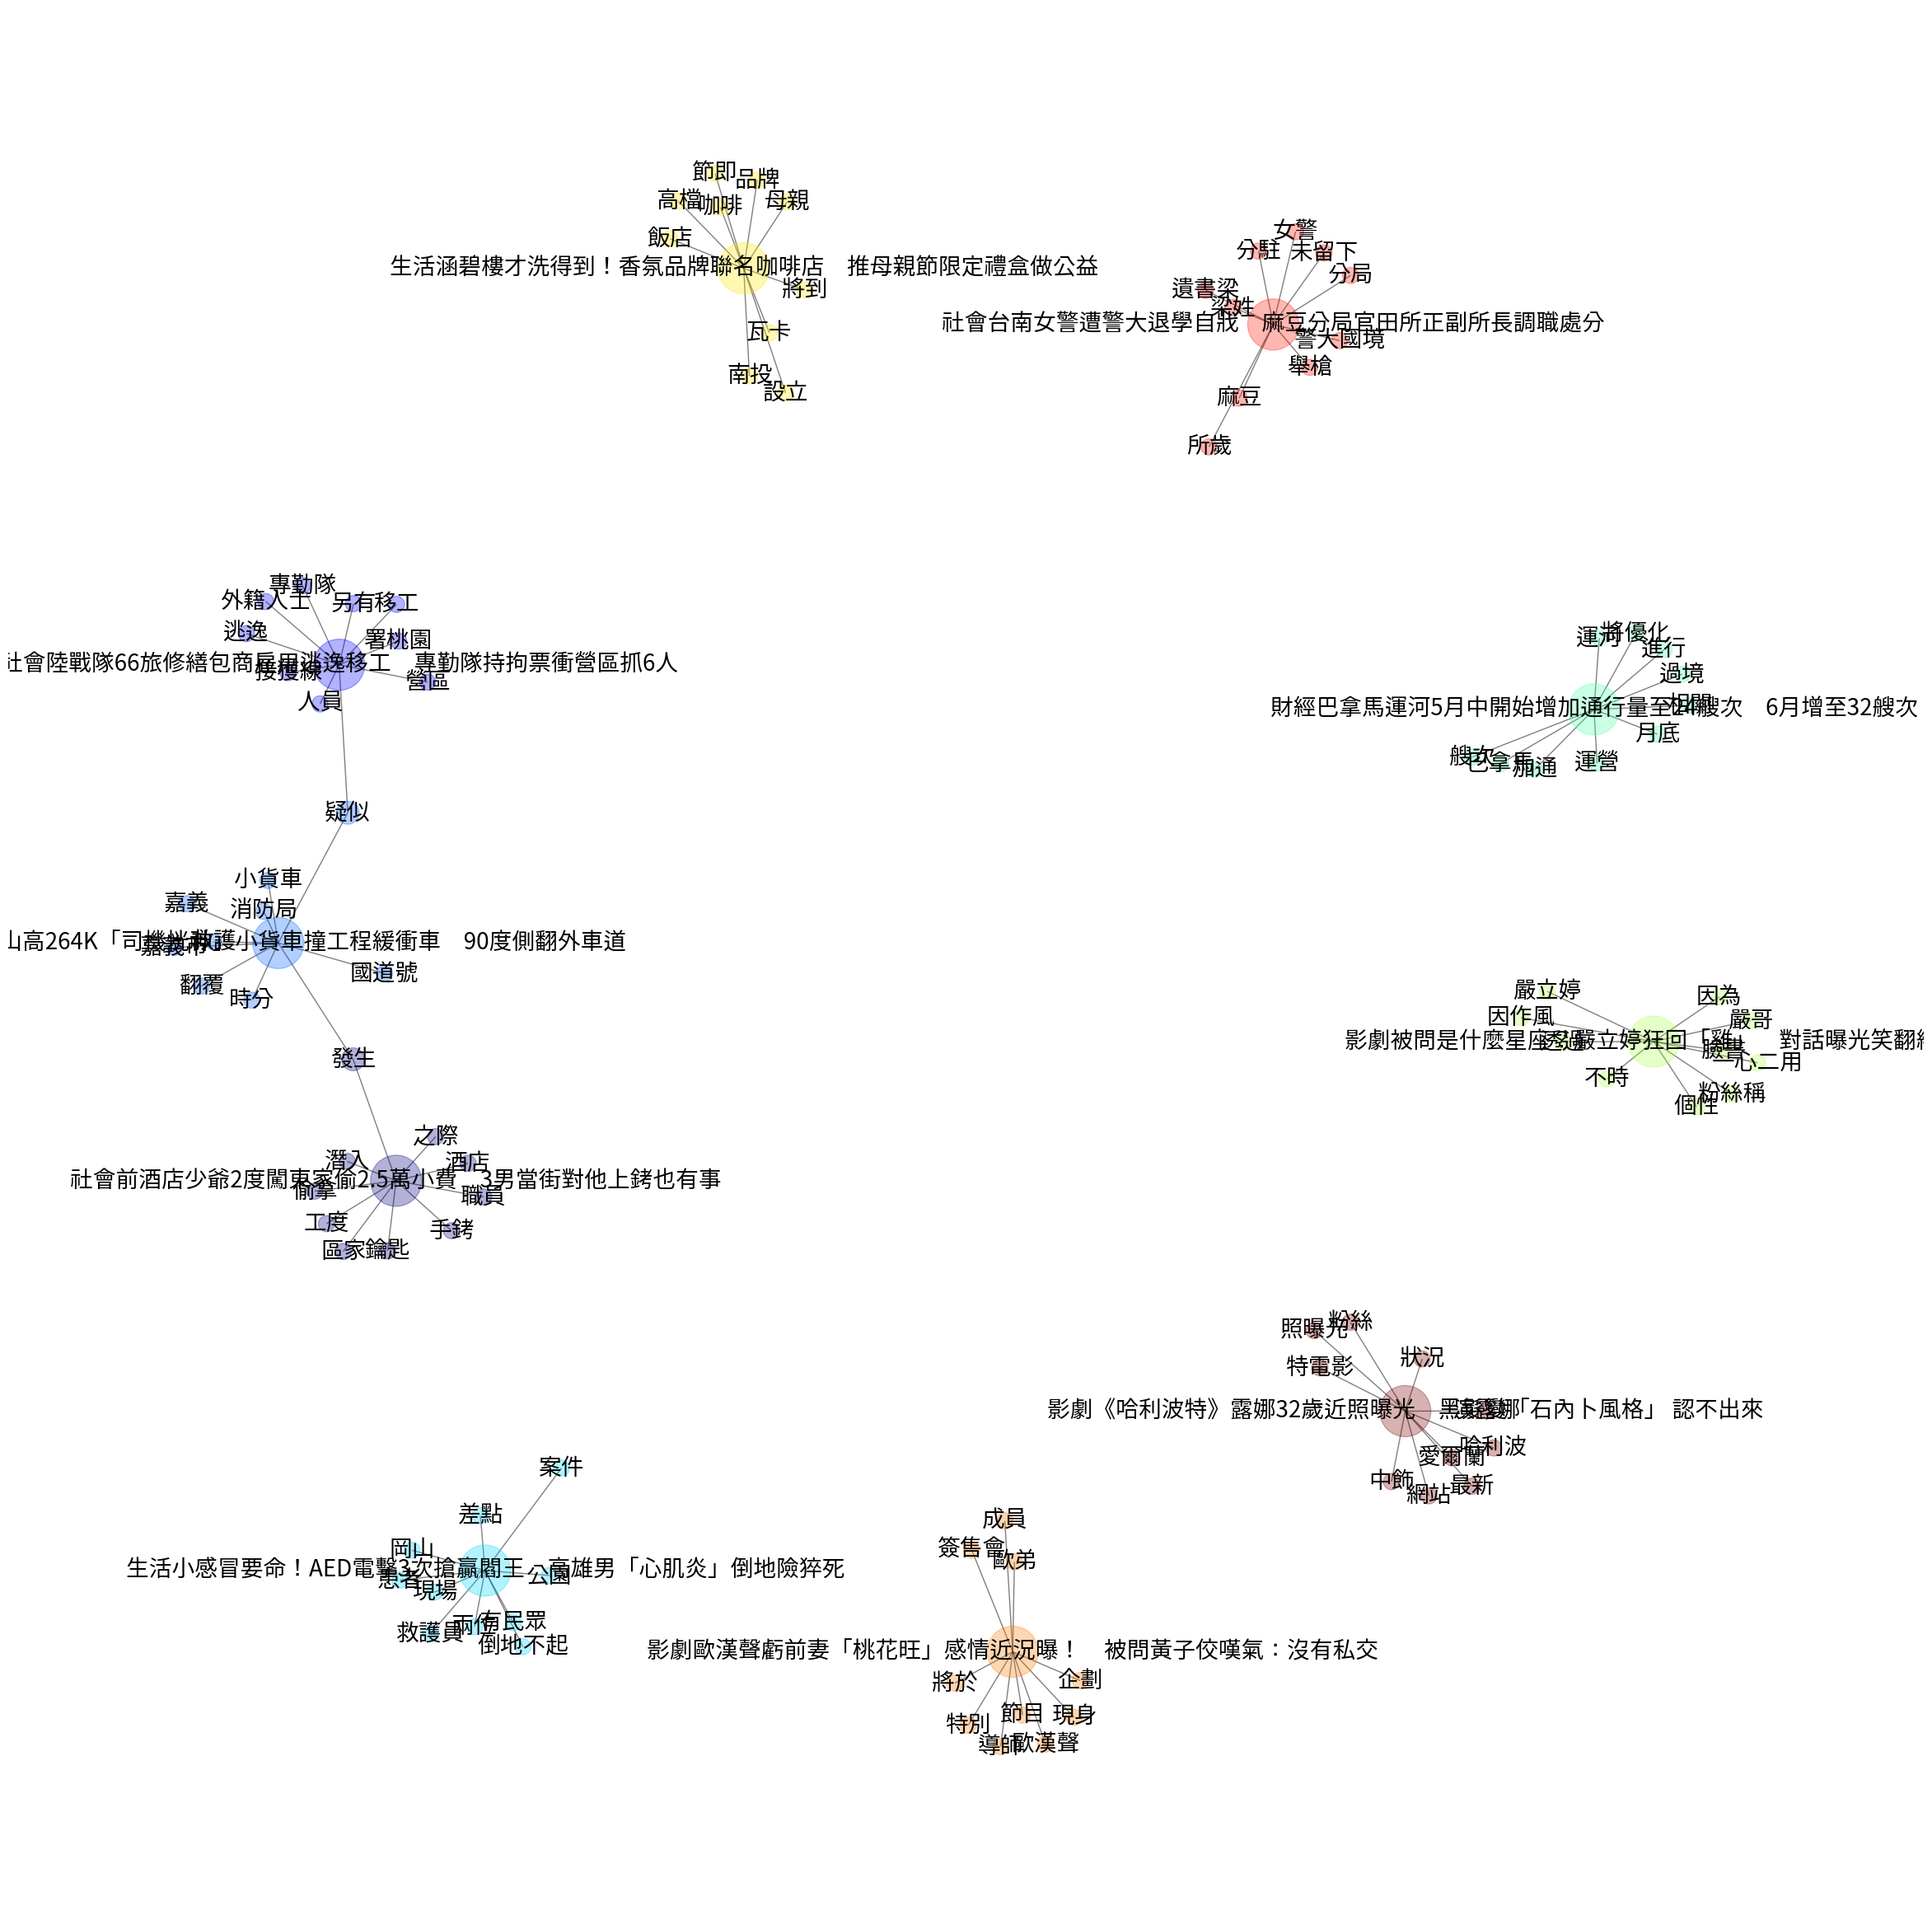

In [34]:
partition = community_louvain.best_partition(G2)

community_colors = [partition[node] for node in G2.nodes()]

cmap = plt.cm.jet
colors_with_alpha = [cmap(community_color / max(community_colors)) for community_color in community_colors]

colors_with_alpha = [(r, g, b, 0.3) for r, g, b, _ in colors_with_alpha]

node_sizes = [200 * G2.degree(node) for node in G2.nodes()]

pos = nx.spring_layout(G2, k=0.2, iterations=80)

plt.figure(figsize=(30, 30))
nx.draw_networkx_edges(G2, pos, alpha=0.5)
nx.draw_networkx_nodes(G2, pos, node_color=colors_with_alpha, node_size=node_sizes, cmap=plt.cm.jet)
nx.draw_networkx_labels(G2, pos, font_size=20, font_family='Taipei Sans TC Beta')

plt.axis('off')
plt.show()